<a href="https://colab.research.google.com/github/raulbenitez/DAPR/blob/master/GMM_clustering_mpg_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
mpg = sns.load_dataset("mpg")

mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [2]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [9]:
mpg1 = mpg.drop(['origin', 'name','horsepower'], axis=1)
mpg1.head()

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [10]:
mpg2 = mpg.select_dtypes(include='number')
mpg2 = mpg2.drop(['horsepower'], axis=1)

mpg2.head()


,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [11]:
mpg2.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000


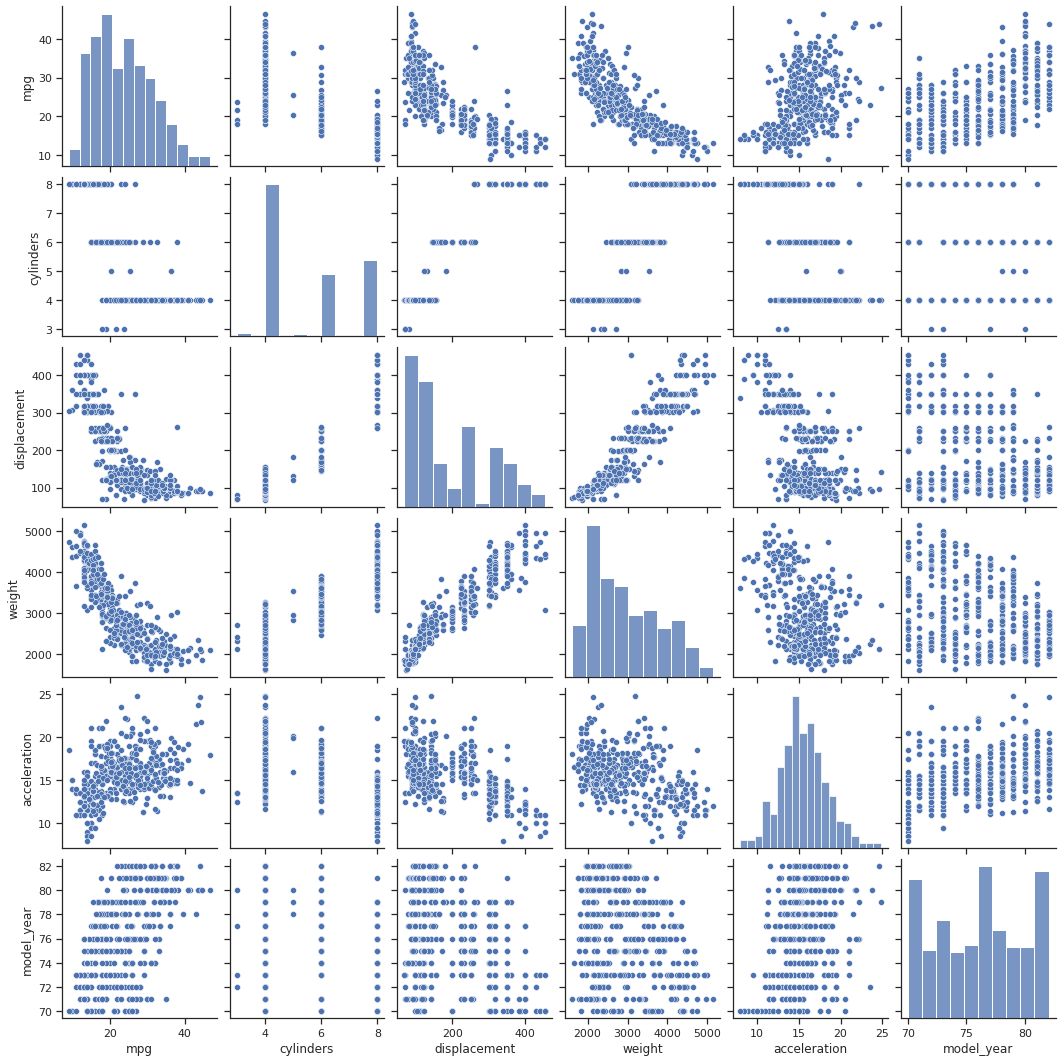

In [12]:
sns.pairplot(mpg2)

In [15]:
X = mpg2.values #extracting numpy array from pandas dataframe
X.shape

(398, 6)

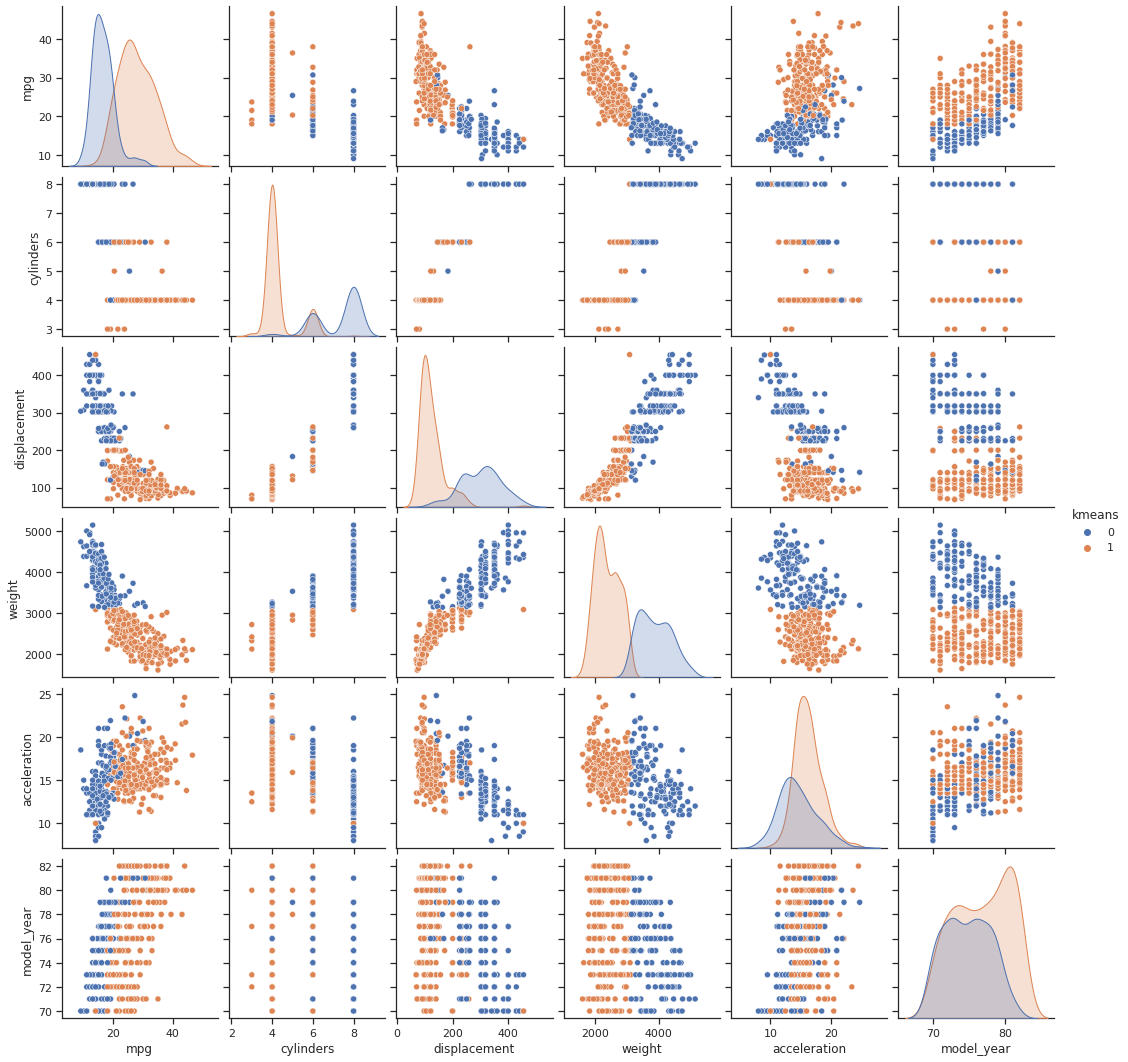

In [16]:
from sklearn.cluster import KMeans
group = KMeans(n_clusters=2).fit_predict(X)

mpg_grouped = mpg2
mpg_grouped['kmeans'] = group
g = sns.pairplot(mpg_grouped, hue="kmeans")

Apply a GMM + BIC clustering method : Fit GMM models from 1 gaussian to 6 gaussians. How many gaussians do we identify in the data? 

In [30]:
import numpy as np
from sklearn import mixture

NMAX = 3
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='tied').fit(X)
    bic.append(gmm.bic(X))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))


gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='tied').fit(X)

[17257.161442376524]
[17257.161442376524, 17055.57766595135]
[17257.161442376524, 17055.57766595135, 15999.450460810865]
...and the winner is GMM model G = 3


In [31]:
gmm.predict(X) # get the labels of each observation associated to clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2,

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


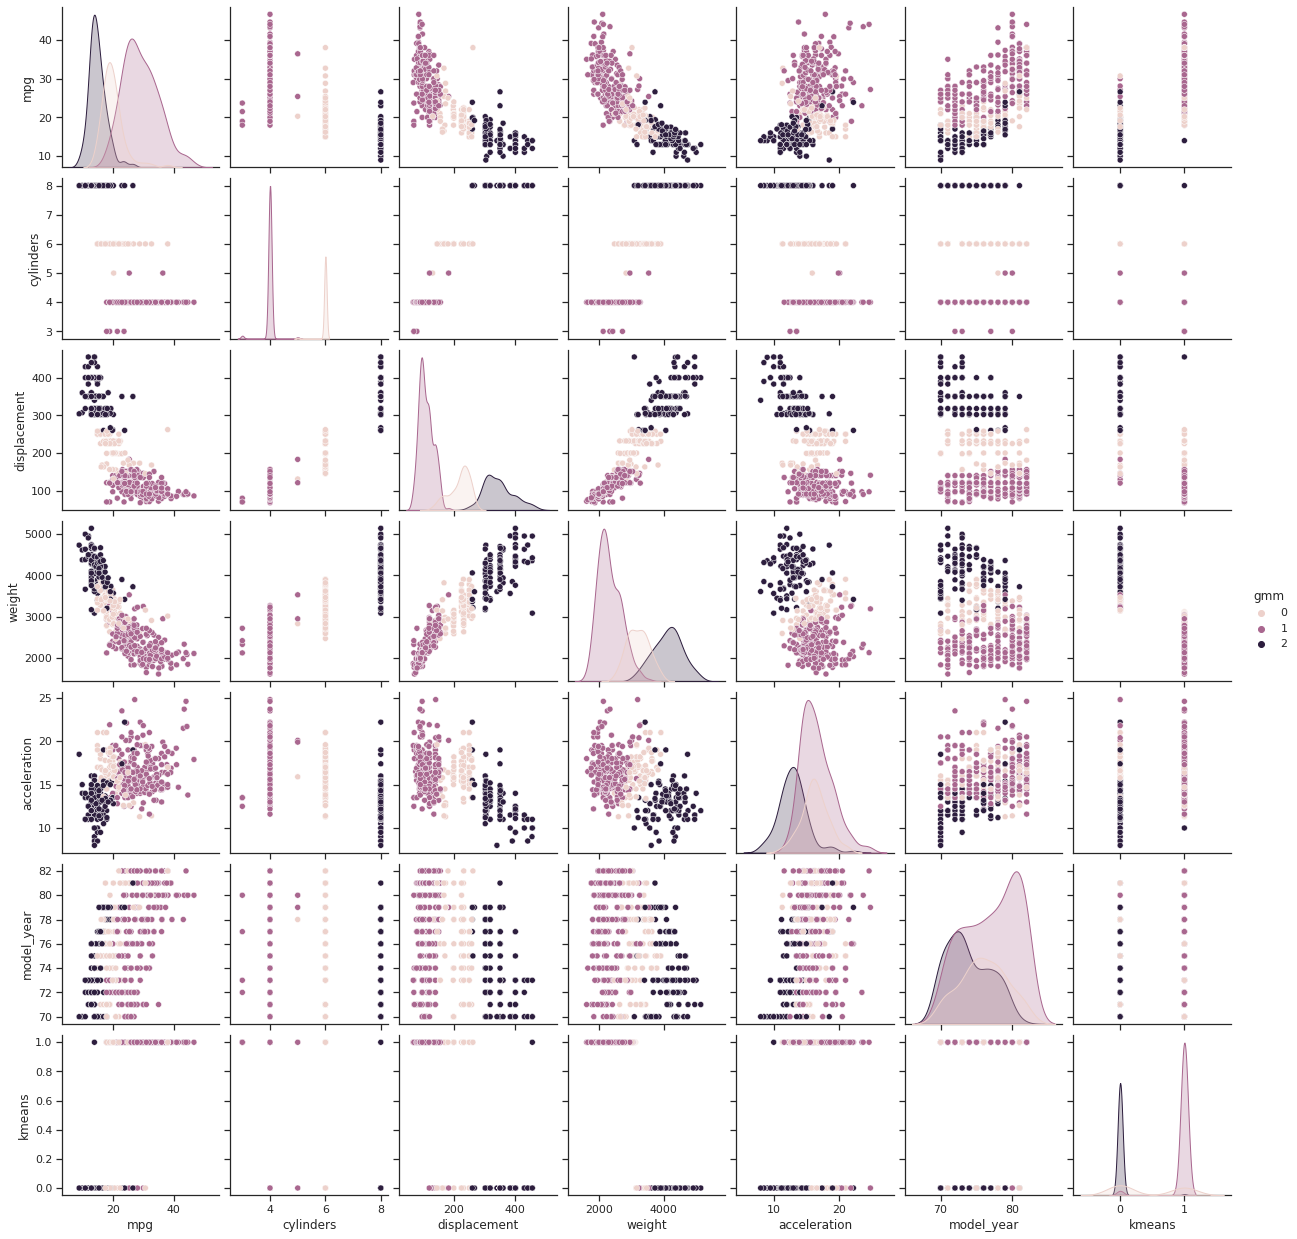

In [32]:
mpg_gmm = mpg2
mpg_gmm['gmm'] = gmm.predict(X)
g = sns.pairplot(mpg_gmm, hue="gmm")